### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
# data = pd.read_csv('data/coupons.csv')
filepath = 'data/coupons.csv'

In [5]:
data.shape 

NameError: name 'data' is not defined

2. Investigate the dataset for missing or problematic data.

In [7]:
data.isnull().sum()

NameError: name 'data' is not defined

3. Decide what to do about your missing data -- drop, replace, other...

In [63]:
# Wrangle function

def wrangle(filepath):
    data = pd.read_csv(filepath)
    # Dropping the 'car' column entirely due to the large number of nulls
    data = data.drop('car', axis=1) 
    # Replace these 5 below columns Nulls, assuming missing is the same as 'never'
    cols = ['Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50']
    for col in cols: 
        data[col] = data[col].fillna('never')

    return data

data = wrangle(filepath)

4. What proportion of the total observations chose to accept the coupon?



In [65]:
total_accepted = data[data['Y'] == 1].shape[0]
print(f"Out of total of {data.shape[0]} observations,"
      f" there are {total_accepted} observations,"
      f" or {round((total_accepted/ data.shape[0] *100), 1)}% of total,"
      f" where driver chose to accept the coupon.")


Out of total of 12684 observations, there are 7210 observations, or 56.8% of total, where driver chose to accept the coupon.


5. Use a bar plot to visualize the `coupon` column.

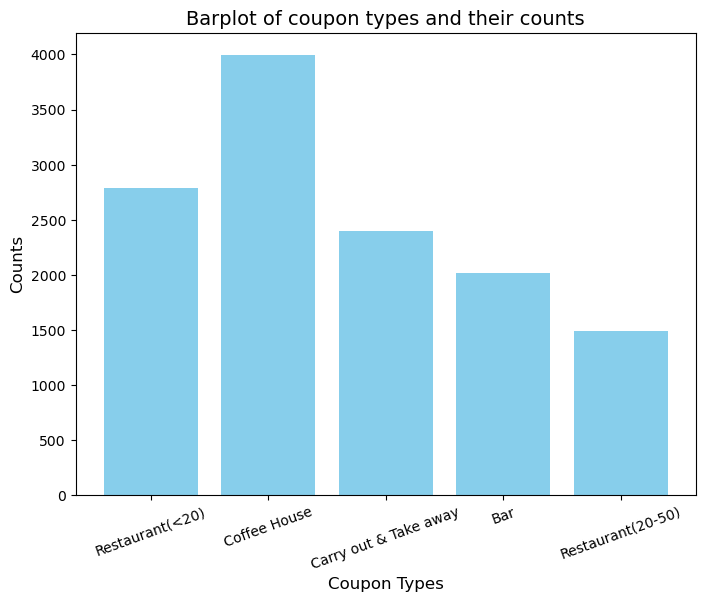

In [381]:
unique_values = data['coupon'].unique()
unique_counts = [data[data['coupon'] == value].shape[0] for value in unique_values]

plt.figure(figsize=(8, 6))
plt.bar(unique_values, unique_counts, color='skyblue')
plt.xlabel('Coupon Types', fontsize=12)
plt.xticks(rotation = 20)
plt.ylabel('Counts', fontsize=12)
plt.title('Barplot of coupon types and their counts', fontsize=14)
plt.savefig('images/coupon_barplot.png')
plt.show()

6. Use a histogram to visualize the temperature column.

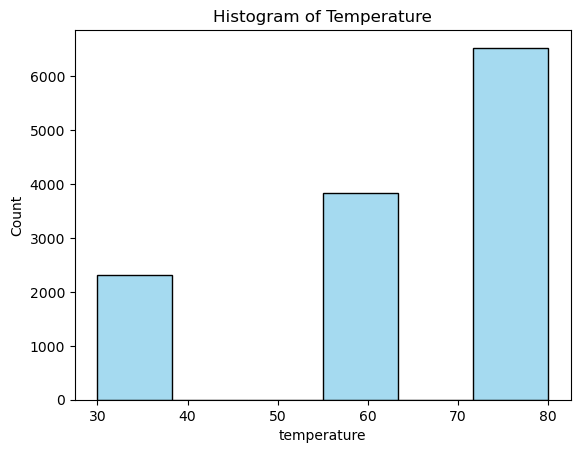

In [81]:
sns.histplot(data['temperature'], kde=False, bins=6, color="skyblue")
plt.title("Histogram of Temperature")
plt.savefig("images/histogram_temp.png")

plt.show()

In [373]:
data_grouped = data.groupby('coupon')[['Y']].value_counts()

#Manually created dataframe to summarize stats -- will need to revise later 
summary_stats = {
    'Total ': [827+1190, 1760+633, 2001+1995, 834+658, 1970+816],
    'Accepted': [827, 1760, 1995, 658, 1970],
    'Declined': [1190, 633, 2001, 834, 816],
    'Acceptance Rate': [827/(827+1190), 1760/(1760+633), 1995/(1995+2001), 658/(658+834), 1970/(1970+816)]
}
summary_stats = pd.DataFrame(summary_stats)
summary_stats.index = ['Bar', 'Carry out & Take away', 'Coffee House', 'Restaurant(20-50)', 'Restaurant(<20)']
summary_stats['Acceptance Rate'] = round(summary_stats['Acceptance Rate'], 2) *100
print(summary_stats)

                       Total   Accepted  Declined  Acceptance Rate
Bar                      2017       827      1190             41.0
Carry out & Take away    2393      1760       633             74.0
Coffee House             3996      1995      2001             50.0
Restaurant(20-50)        1492       658       834             44.0
Restaurant(<20)          2786      1970       816             71.0


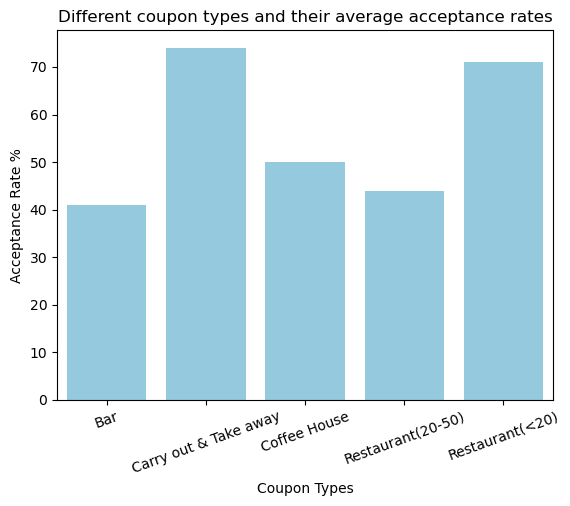

In [391]:
sns.barplot(x=summary_stats.index, y='Acceptance Rate', data=summary_stats, color='skyblue')
plt.xticks(rotation=20)
plt.xlabel('Coupon Types')
plt.ylabel('Acceptance Rate %')
plt.title('Different coupon types and their average acceptance rates')
plt.savefig('images/barplot_accept_rate.png')

plt.show()

In [85]:
data["coupon"].unique() # EDA

array(['Restaurant(<20)', 'Coffee House', 'Carry out & Take away', 'Bar',
       'Restaurant(20-50)'], dtype=object)

In [195]:
df_bar['age'].unique() # EDA

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [111]:
data['Bar'].value_counts() # EDA

Bar
never    5304
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [211]:
df_bar = data[data["coupon"] == "Bar"]

2. What proportion of bar coupons were accepted?


In [173]:
bar_coupons_accepted = df_bar[df_bar['Y'] == 1].shape[0]

print(f"There were {bar_coupons_accepted} accepted,"
      f" or {round((bar_coupons_accepted/ df_bar['Y'].shape[0])*100, 2)}% of"
      f" total of {df_bar['Y'].shape[0]} bar coupons.")

There were 827 accepted, or 41.0% of total of 2017 bar coupons.


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [219]:
df_bar = data[data["coupon"] == "Bar"].copy()  
categories = ['never', 'less1', '1~3', '4~8', 'gt8']

# Group and count total occurrences
df_bar_grouped = df_bar.groupby('Bar')[['Y']].agg('count').rename(columns={'Y': 'total'})

df_bar_grouped = df_bar_grouped.reindex(categories, fill_value=0)

# Add the 'accepted' column
df_bar_grouped['accepted'] = (
    df_bar[df_bar['Y'] == 1]
    .groupby('Bar')['Y']
    .agg('count')
    .reindex(categories, fill_value=0)
)


# Calculate the acceptance rate
low_freq_accept_rate = round((257+253+164) / (851+570+397) *100, 2)
high_freq_accept_rate = round((117+36) / (150+49)*100, 2)                      
                      
print(df_bar_grouped)
print(f"The acceptance rate for people who went to the bar 3 times or fewer is: {low_freq_accept_rate}%."
      f"\nThe acceptance rate for people who went more is: {high_freq_accept_rate}%.")


       total  accepted
Bar                   
never    851       164
less1    570       253
1~3      397       257
4~8      150       117
gt8       49        36
The acceptance rate for people who went to the bar 3 times or fewer is: 37.07%.
The acceptance rate for people who went more is: 76.88%.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [395]:
df_bar = data[data["coupon"] == "Bar"].copy()  
# Remove strings 
df_bar['age'] = df_bar['age'].apply(lambda x: {'50plus': 50, 'below21': 20}.get(x, x))
# Convert object to int
df_bar['age'] = df_bar['age'].astype(int)

# Create new categorical column 
df_bar['bar_patron_over_25'] = np.where((df_bar['Bar'] != 'never') & 
                                        (df_bar['Bar'] != 'less1') &
                                        (df_bar['age'] > 25), 1, 0)

# Create new df for acceptance rate calculation 
df_bar_grouped = df_bar.groupby('bar_patron_over_25')[['Y']].agg('count')
df_bar_grouped['accepted'] = (
    df_bar[df_bar['Y'] == 1]
    .groupby('bar_patron_over_25')['Y']
    .agg('count')
)
bar_patron_over_25_accept_rate = round((475/870)*100, 2)
other_accept_rate = round((352/1147)*100, 2)

print(f"The acceptance rate for people went to bar atleast once per month and over 25 is: {bar_patron_over_25_accept_rate}%."
      f"\nThe acceptance rate for all others is: {other_accept_rate}%.")

The acceptance rate for people went to bar atleast once per month and over 25 is: 54.6%.
The acceptance rate for all others is: 30.69%.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [245]:
# 3 conditions: bar > 1/mo;  !kids; occupation != ['farming', 'fishing' or 'forestry']
df_bar = data[data["coupon"] == "Bar"].copy()
df_bar['passanger'] = df_bar['passanger'].apply(lambda x: {'Kid(s)': 0}.get(x, 1))
df_bar['passanger'] = df_bar['passanger'].astype(int)
df_bar['occupation'] = df_bar['occupation'].apply(lambda x: {'farming': 0, 'fishing': 0, 'forestry': 0 }.get(x, 1))
df_bar['occupation'] = df_bar['occupation'].astype(int)

# Create new column based on conditions
df_bar['excluded_kids_occupations'] = np.where((df_bar['Bar'] != 'never') 
                                               & (df_bar['passanger'] == 1) 
                                               & (df_bar['occupation'] == 1), 1, 0)

df_bar_grouped = df_bar.groupby('excluded_kids_occupations')[['Y']].agg('count')
df_bar_grouped['accepted'] = (
    df_bar[df_bar['Y'] == 1]
    .groupby('excluded_kids_occupations')['Y']
    .agg('count')
)
excluced_accept_rate = round((194/953) *100, 2)
included_accept_rate = round((633/1064) *100, 2)

print(df_bar_grouped)
print(f"The acceptance rate for bar patrons meeting all three conditions is: {included_accept_rate}%."
      f"\nThe acceptance rate for all others is: {excluced_accept_rate}%.")

                              Y  accepted
excluded_kids_occupations                
0                           953       194
1                          1064       633
The acceptance rate for bar patrons meeting all three conditions is: 59.49%.
The acceptance rate for all others is: 20.36%.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [321]:
# Name the conditions as condition1, condition2, condition 3, need columns 'maritalStatus', 'age', 'RestaurantLessThan20', 'income'
# df_bar = data[data["coupon"] == "Bar"].copy()
# df_bar['Bar'] = df_bar['Bar'].apply(lambda x: {'never': 0, 'less1':0}.get(x, 1)) # 0 for never and less1
# df_bar['Bar'] = df_bar['Bar'].astype(int)
# df_bar['passanger'] = df_bar['passanger'].apply(lambda x: {'Kid(s)': 0}.get(x, 1)) # 0 for kids 
# df_bar['passanger'] = df_bar['passanger'].astype(int)
# df_bar['maritalStatus'] = df_bar['maritalStatus'].apply(lambda x: {'Widowed': 0}.get(x, 1)) # 0 for windowed
# df_bar['maritalStatus'] = df_bar['maritalStatus'].astype(int)
# df_bar['age'] = df_bar['age'].apply(lambda x: {'46': 0, '31': 0, '41': 0, '50plus': 0, '36': 0}.get(x, 1)) # 0 for > 30,
# df_bar['age'] = df_bar['age'].astype(int)
# df_bar['RestaurantLessThan20'] = df_bar['RestaurantLessThan20'].apply(lambda x: {'never': 0, 'less1': 0, '1~3': 0 }.get(x, 1)) # 0 for < 4
# df_bar['RestaurantLessThan20'] = df_bar['RestaurantLessThan20'].astype(int)
# df_bar['income'] = df_bar['income'].apply(lambda x: {'$62500 - $74999': 0, 
#                                                      '$75000 - $87499': 0, 
#                                                      '$50000 - $62499': 0,
#                                                      '$100000 or More': 0, 
#                                                      '$87500 - $99999': 0
#                                                     }.get(x, 1)) # 0 for income > 50K
# df_bar['income'] = df_bar['income'].astype(int)
# #Create new categorical column
# df_bar['condition1'] = np.where((df_bar['Bar'] == 1) &
#                                 (df_bar['passanger'] == 1) &
#                                 (df_bar['maritalStatus'] == 1), 1, 0)
# df_bar['condition2'] = np.where((df_bar['Bar'] == 1) &
#                                 (df_bar['age'] == 1), 1, 0)
# df_bar['condition3'] = np.where((df_bar['RestaurantLessThan20'] == 1) &
#                                 (df_bar['income'] == 1), 1, 0)
# # group_columns = ['condition1', 'condition2', 'condition3'] 
# df_bar_grouped1 = df_bar.groupby('condition1')[['Y']].agg('count')
# df_bar_grouped1['accepted'] = (
#     df_bar[df_bar['Y'] == 1]
#     .groupby('condition1')['Y']
#     .agg('count')
# )
# df_bar_grouped2 = df_bar.groupby('condition2')[['Y']].agg('count')
# df_bar_grouped2['accepted'] = (
#     df_bar[df_bar['Y'] == 1]
#     .groupby('condition2')['Y']
#     .agg('count')
# )
# df_bar_grouped3 = df_bar.groupby('condition3')[['Y']].agg('count')
# df_bar_grouped3['accepted'] = (
#     df_bar[df_bar['Y'] == 1]
#     .groupby('condition3')['Y']
#     .agg('count')
# )
# condition1_accept_rate = round((df_bar_grouped1.loc[1, 'accepted']/df_bar_grouped1.loc[1, 'Y'])*100, 2)
# condition2_accept_rate = round((df_bar_grouped2.loc[1, 'accepted']/df_bar_grouped2.loc[1, 'Y'])*100, 2)
# condition3_accept_rate = round((df_bar_grouped3.loc[1, 'accepted']/df_bar_grouped3.loc[1, 'Y'])*100, 2)

# print(df_bar_grouped1)
# print(df_bar_grouped2)
# print(df_bar_grouped3)

# print(f"The acceptance rate for group meeting 1st set of conditions is: {condition1_accept_rate}%.\n"
#       f"The acceptance rate for group meeting 2nd set of conditions is: {condition2_accept_rate}%.\n"
#       f"The acceptance rate for group meeting 3rd set of conditions is: {condition3_accept_rate}%.\n"
# )

## Rewrite cleaner code below

df_bar = data[data["coupon"] == "Bar"].copy()

# Map transformations for multiple columns
mapping = {
    'Bar': {'never': 0, 'less1': 0},
    'passanger': {'Kid(s)': 0},
    'maritalStatus': {'Widowed': 0},
    'age': {'46': 0, '31': 0, '41': 0, '50plus': 0, '36': 0},
    'RestaurantLessThan20': {'never': 0, 'less1': 0, '1~3': 0},
    'income': {
        '$62500 - $74999': 0, '$75000 - $87499': 0, '$50000 - $62499': 0, 
        '$100000 or More': 0, '$87500 - $99999': 0
    }
}

for column, map_dict in mapping.items():
    df_bar[column] = df_bar[column].map(map_dict).fillna(1).astype(int)

# Create new categorical columns
df_bar['condition1'] = np.where(
    (df_bar['Bar'] == 1) & (df_bar['passanger'] == 1) & (df_bar['maritalStatus'] == 1), 1, 0
)
df_bar['condition2'] = np.where((df_bar['Bar'] == 1) & (df_bar['age'] == 1), 1, 0)
df_bar['condition3'] = np.where((df_bar['RestaurantLessThan20'] == 1) & (df_bar['income'] == 1), 1, 0)

# Define a function for grouped stats
def calculate_grouped_stats(df, condition_column):
    grouped = df.groupby(condition_column)[['Y']].agg('count')
    grouped['accepted'] = df[df['Y'] == 1].groupby(condition_column)['Y'].agg('count')
    return grouped

# Grouped statistics for each condition
conditions = ['condition1', 'condition2', 'condition3']
grouped_stats = {condition: calculate_grouped_stats(df_bar, condition) for condition in conditions}

# Calculate acceptance rates
acceptance_rates = {
    condition: round((stats.loc[1, 'accepted'] / stats.loc[1, 'Y']) * 100, 2)
    for condition, stats in grouped_stats.items()
}

# Print results
for i, condition in enumerate(conditions, start=1):
    print(grouped_stats[condition])
    print(f"The acceptance rate for group meeting {i} set of conditions is: {acceptance_rates[condition]}%.\n")

               Y  accepted
condition1                
0           1466       434
1            551       393
The acceptance rate for group meeting 1 set of conditions is: 71.32%.

               Y  accepted
condition2                
0           1672       578
1            345       249
The acceptance rate for group meeting 2 set of conditions is: 72.17%.

               Y  accepted
condition3                
0           1673       671
1            344       156
The acceptance rate for group meeting 3 set of conditions is: 45.35%.



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [291]:
print(f"The observations suggested that the acceptance rates for Bar coupons are higher when driver is a regular bar patron and passenger does not include kids."
      f" However, acceptance rates tend to decrease as age range increases or income level decreases."
      f" \nIn summary, the observations indicate there is business opportunity in increasing Bar coupon acceptance rates above the average of 41.0%."
      f" This can be achieved by targeting specific groups of drivers using above conditions.")

The observations suggested that the acceptance rates for Bar coupons are higher when driver is a regular bar patron and passenger does not include kids. However, acceptance rates tend to decrease as age range increases or income level decreases. 
In summary, the observations indicate there is business opportunity in increasing Bar coupon acceptance rates above the average of 41.0%. This can be achieved by targeting specific groups of drivers using above conditions.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [297]:
# Select 'Coffee House' coupons for analysis
df_coffee = data[data["coupon"] == "Coffee House"]

In [305]:
# Set baseline with average acceptance rate for Coffee House coupons
coffee_coupons_accepted = df_coffee[df_coffee['Y'] == 1].shape[0]
baseline_accept_rate = round((coffee_coupons_accepted/ df_coffee['Y'].shape[0]) *100, 2)

print(f"There were {coffee_coupons_accepted} accepted,"
      f" or {baseline_accept_rate}% of"
      f" total of {df_coffee['Y'].shape[0]} Coffee House coupons.")

There were 1995 accepted, or 49.92% of total of 3996 Coffee House coupons.


In [333]:
# Select conditions based on coffee house patron history (>1), income level (<50K), education (atleast some college), and driving destination (!= home)
# Map transformations for multiple columns in df
df_coffee = data[data["coupon"] == "Coffee House"].copy()
mapping = {
    'CoffeeHouse': {'never': 0, 'less1': 0},
    'education': {'High School Graduate': 0, 'Some High School': 0},
    'destination': {'Home': 0},
    'income': {
        '$62500 - $74999': 0, '$75000 - $87499': 0, '$50000 - $62499': 0, 
        '$100000 or More': 0, '$87500 - $99999': 0
    }
}

for column, map_dict in mapping.items():
    df_coffee[column] = df_coffee[column].map(map_dict).fillna(1).astype(int)


In [337]:
# Create new categorical columns for condition sets:
# 1st set: >1 visits to Coffee house and income level is <50K
df_coffee['patron_low_income'] = np.where(
    (df_coffee['CoffeeHouse'] == 1) & (df_coffee['CoffeeHouse'] == 1) & (df_coffee['income'] == 1), 1, 0
)
# 2nd set: >1 visits to Coffee house and education is atleast some college or more 
df_coffee['patron_college_education'] = np.where((df_coffee['CoffeeHouse'] == 1) & (df_coffee['education'] == 1), 1, 0)
# 3rd set: >1 visits to Cofee house and isn't on the way home
df_coffee['patron_outbound_destination'] = np.where((df_coffee['CoffeeHouse'] == 1) & (df_coffee['destination'] == 1), 1, 0)

In [347]:
# Grouped statistics for each set of conditions
conditions = ['patron_low_income', 'patron_college_education', 'patron_outbound_destination']
grouped_stats = {condition: calculate_grouped_stats(df_coffee, condition) for condition in conditions}

In [349]:
# Calculate acceptance rates for each of the set of conditions and print results
acceptance_rates = {
    condition: round((stats.loc[1, 'accepted'] / stats.loc[1, 'Y']) * 100, 2)
    for condition, stats in grouped_stats.items()
}

for i, condition in enumerate(conditions, start=1):
    print(grouped_stats[condition])
    print(f"The acceptance rate for group meeting {i} set of conditions ({condition}) is: {acceptance_rates[condition]}%.\n")

                      Y  accepted
patron_low_income                
0                  2971      1280
1                  1025       715
The acceptance rate for group meeting 1 set of conditions (patron_low_income) is: 69.76%.

                             Y  accepted
patron_college_education                
0                         2207       823
1                         1789      1172
The acceptance rate for group meeting 2 set of conditions (patron_college_education) is: 65.51%.

                                Y  accepted
patron_outbound_destination                
0                            2517       967
1                            1479      1028
The acceptance rate for group meeting 3 set of conditions (patron_outbound_destination) is: 69.51%.



In [351]:
# Print conclusion from the observations using income level, education and destination 
print(f"The observations showed that the characteristics of people who accepts"
      f" coupons for coffee house tend to have income lower than 50K, with highest education beyond high school, and isn't driving home"
)

The observations showed that the characteristics of people who accepts coupons for coffee house tend to have income lower than 50K, with highest education beyond high school, and isn't driving home
